We have train and test data set, train data set has both input and output variables and We need to predict the sales for test data set
TARGET VARIABLE= PREDICTING Item_Outlet_Sales
since its a continuous variable we will predict with regression models

In [1]:
import pandas as pd
datatest=pd.read_csv('bigdatamart_test.csv')
datatrain=pd.read_csv('bigdatamart_train.csv')

In [2]:
datatest

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [3]:
datatest.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


UNDERSTANDING THE COLUMNS

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered
    
Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
datatrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
datatest.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
datatrain.shape,datatest.shape

((8523, 12), (5681, 11))

In [8]:
datatrain['source'] = 'train'
datatest['source'] = 'test'
df= pd.concat([datatrain, datatest], sort = False)
print(datatrain.shape, datatest.shape, data.shape)

NameError: name 'data' is not defined

In [ ]:
for i in datatrain.describe().columns:
    sns.distplot(datatrain[i].dropna())
    plt.show
                           

In [ ]:
datatrain.Item_Type.value_counts()

In [ ]:
df['Item_Outlet_Sales'].describe()

In [ ]:
df.head()

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

NameError: name 'data' is not defined

NameError: name 'data' is not defined

In [12]:
data.isnull().sum()

NameError: name 'data' is not defined

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int32  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int32  
 9   Outlet_Location_Type       14204 non-null  int32  
 10  Outlet_Type                14204 non-null  int32  
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
 13  Item_Type_Combined         14204 non-null  int3

analysing data

In [103]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [28]:
#we can find outliers present as mean and median vary largely, while all other data are normally distributed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

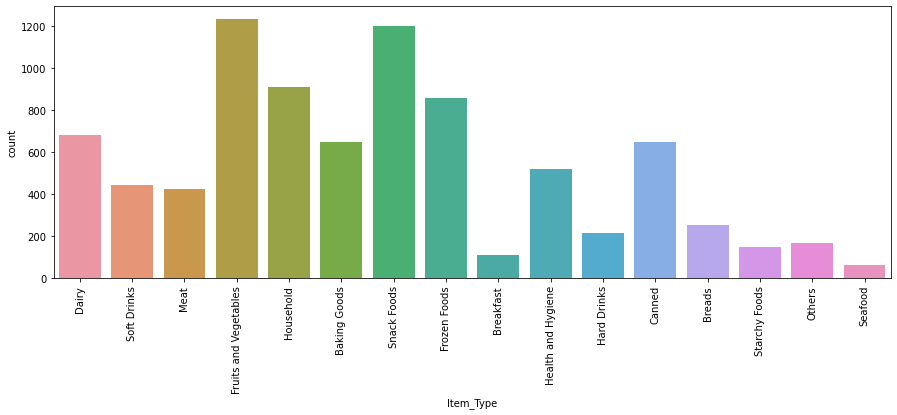

In [112]:
plt.figure(figsize=(15,5))
sns.countplot(datatrain.Item_Type)
plt.xticks(rotation=90)

In [113]:
datatrain.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

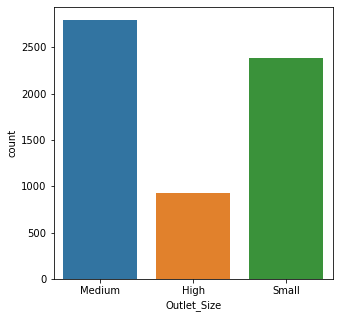

In [106]:
plt.figure(figsize=(5,5))
sns.countplot(datatrain.Outlet_Size)

In [114]:
datatrain.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

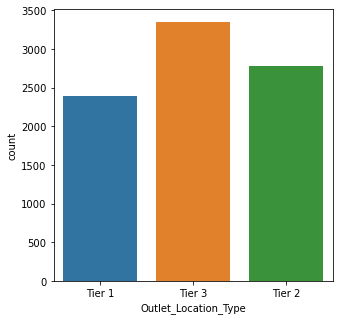

In [115]:
plt.figure(figsize=(5,5))
sns.countplot(datatrain.Outlet_Location_Type)

In [116]:
datatrain.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

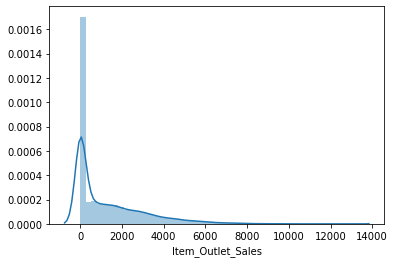

In [31]:
sns.distplot(data['Item_Outlet_Sales'])

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

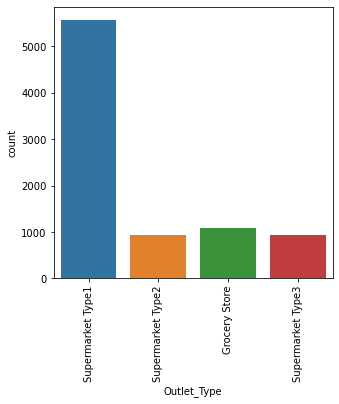

In [118]:
plt.figure(figsize=(5,5))
sns.countplot(datatrain.Outlet_Type)
plt.xticks(rotation=90)

In [119]:
datatrain.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

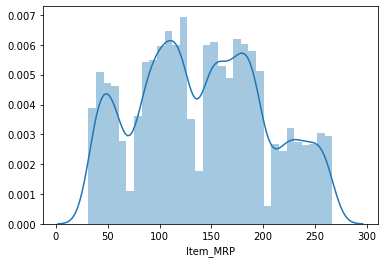

In [120]:
sns.distplot(df['Item_MRP'])


In [121]:
#the data is spread widely between 0-250

In [122]:

import warnings
warnings.filterwarnings("ignore")

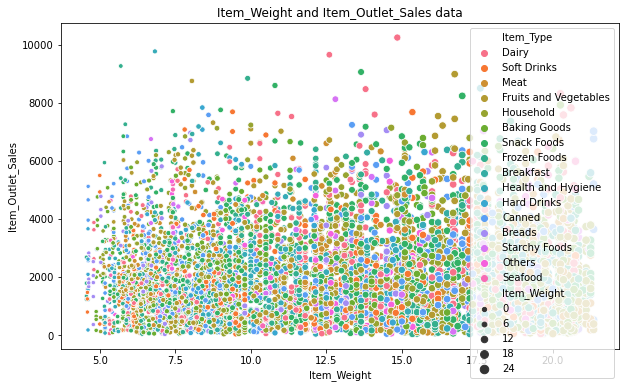

In [15]:
plt.figure(figsize=(10,6))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales data")

sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",hue='Item_Type',size='Item_Weight',data=datatrain)

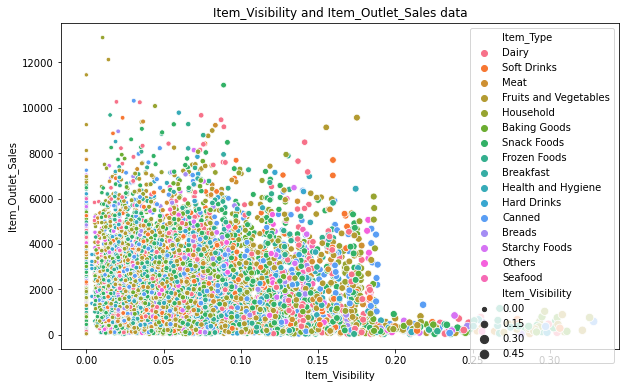

In [16]:
plt.figure(figsize=(10,6))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales data")

sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",hue='Item_Type',size='Item_Visibility',data=datatrain)

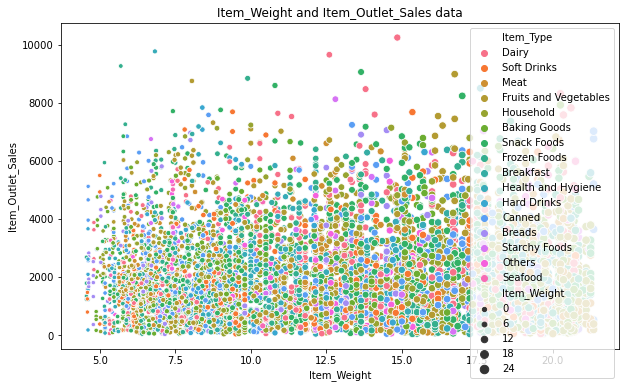

In [17]:
plt.figure(figsize=(10,6))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales data")

sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",hue='Item_Type',size='Item_Weight',data=datatrain)

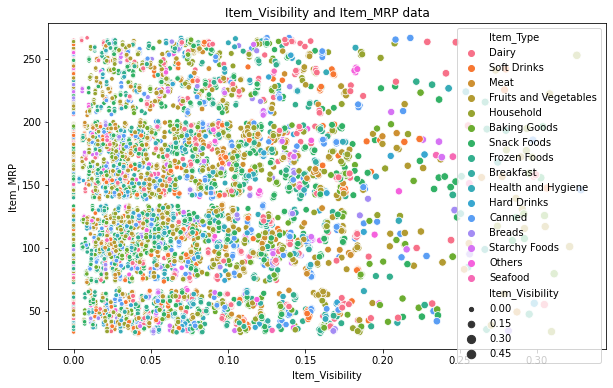

In [18]:
plt.figure(figsize=(10,6))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_MRP")
plt.title("Item_Visibility and Item_MRP data")

sns.scatterplot(x="Item_Visibility",y="Item_MRP",hue='Item_Type',size='Item_Visibility',data=datatrain)

ValueError: could not convert string to float: 'Low Fat'

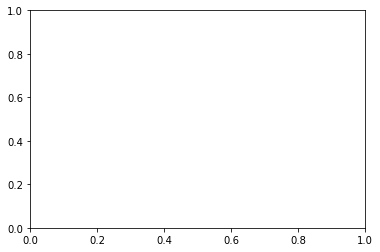

In [40]:
plt.figure(figsize=(10,6))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_MRP")
plt.title("Item_Visibility and Item_MRP data")

sns.scatterplot(x="Item_Visibility",y="Item_MRP",hue='Item_Type',size='Item_Visibility',data=datatrain)


In [41]:
#we can observe most of the data falls under low fat and regular category

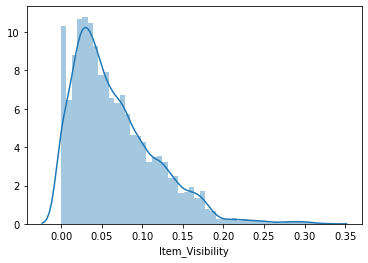

In [42]:
sns.distplot(data['Item_Visibility'])


#the data is positively skewed,we find some  of the data falls on zero, which makes no sense for analysis,hence replace zero with mean

In [27]:
df['Item_Weight']=df['Item_Weight'].fillna((df['Item_Weight'].mean()))

In [42]:
df['Outlet_Size'].value_counts()


Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [41]:

df['Outlet_Size'].fillna(df['Outlet_Size'].mode().values[0],inplace=True)


In [46]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()


879

In [50]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)


In [44]:
missing_values

0.06188397634469164

In [53]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [55]:
df['Outlet_Years']=2009-df['Outlet_Establishment_Year']


In [56]:
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [48]:
#we can observe no of years outlet is present in this industry--oldest one with 24yrs and new established in 2009

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022758EB9340>,
      dtype=object)

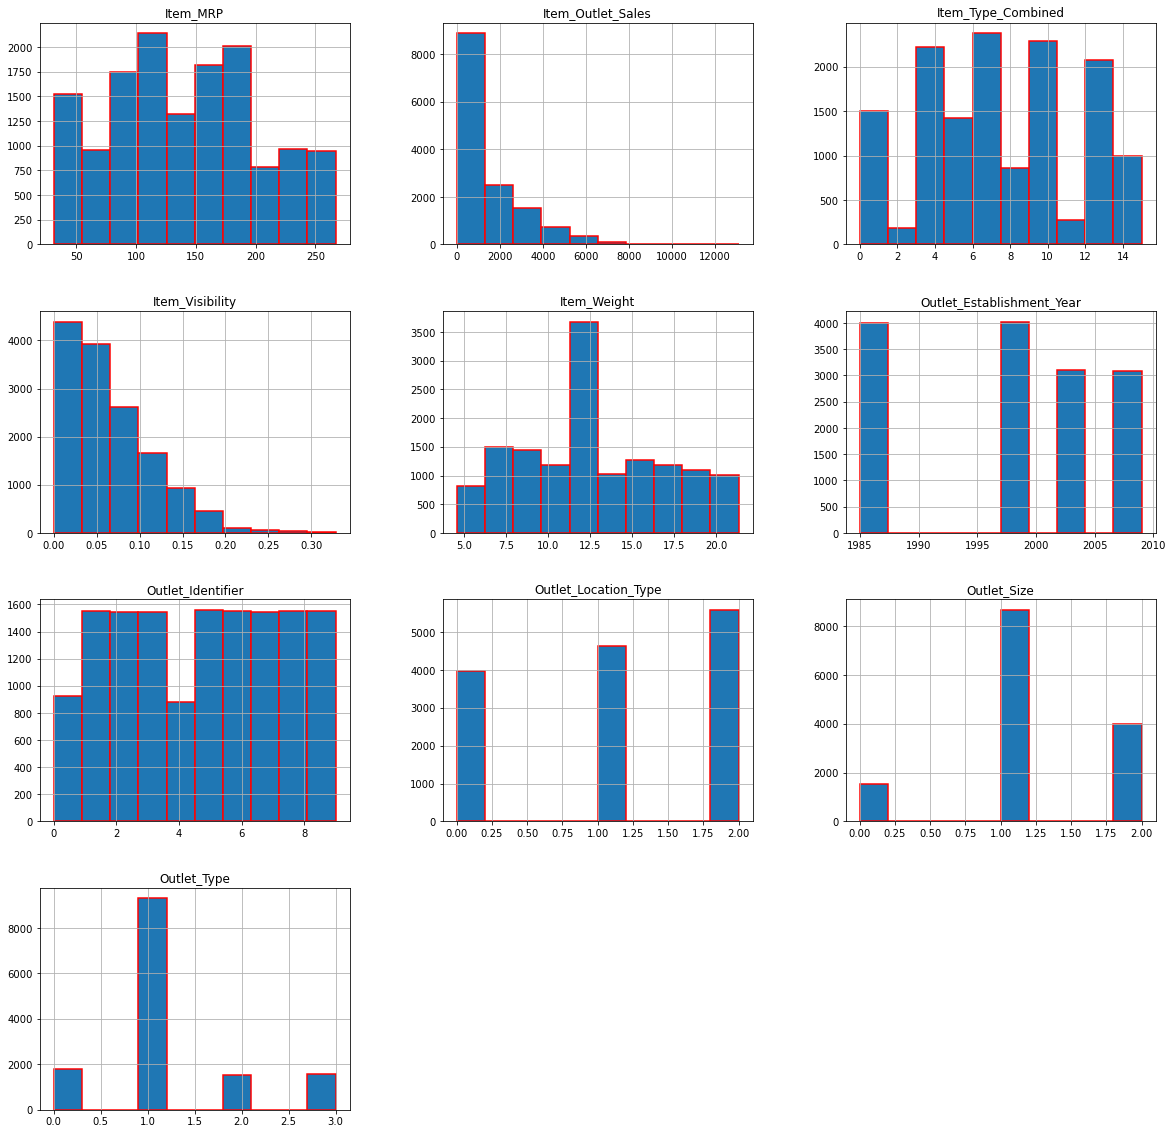

In [49]:
data.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

In [50]:
#we can observe data not normally distributed

In [51]:
data.apply(lambda x unique: len(x.()))


SyntaxError: invalid syntax (<ipython-input-51-1a29de4ef035>, line 1)

In [ ]:
plt.figure(figsize = (14,9))

plt.subplot(212)
a = sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
a.set_title("Outlet_Identifier vs. Item_Outlet_Type", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Item_Outlet_Sales", fontsize=12)

In [ ]:
#We can observe outliers in all outlet type 

In [ ]:
plt.figure(figsize = (14,9))

plt.subplot(211)
a = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
a.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Item_Outlet_Sales", fontsize=12)

In [ ]:
#outliers found in all data,found mare amount of sales is in OUT027 outlet identifier

Text(0, 0.5, 'Item_Outlet_Sales')

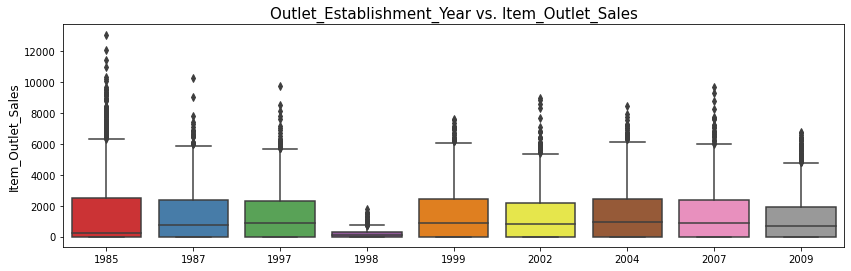

In [52]:
plt.figure(figsize = (14,9))

plt.subplot(211)
a = sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=data, palette="Set1")
a.set_title("Outlet_Establishment_Year vs. Item_Outlet_Sales", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Item_Outlet_Sales", fontsize=12)

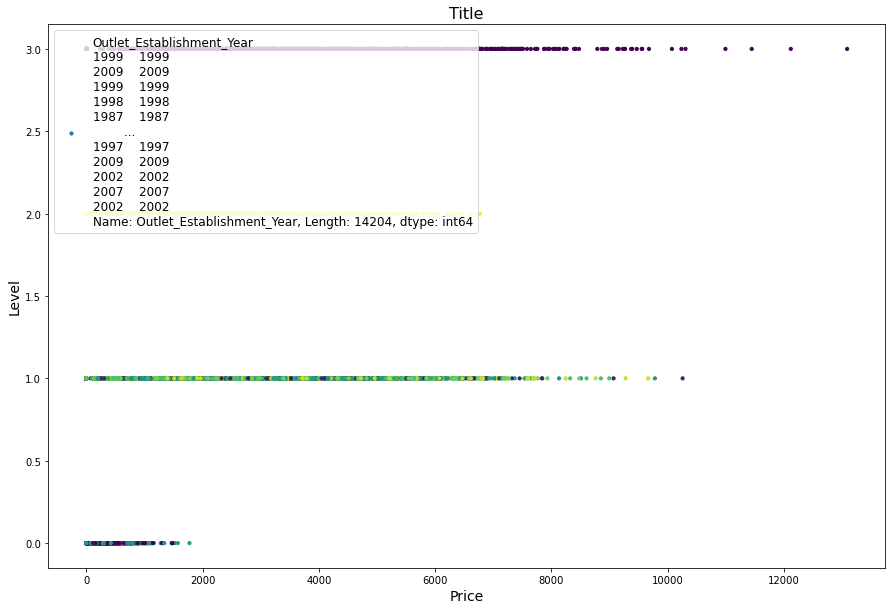

In [53]:
import matplotlib.pyplot as plt
colors = ['turquoise','orange','red','mediumblue', 'orchid', 'limegreen']

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.scatter(data['Item_Outlet_Sales'], data['Outlet_Type'], s=10, c=data['Outlet_Establishment_Year'], marker="o", label=data['Outlet_Establishment_Year'])
plt.title('Title', fontsize=16)
plt.ylabel('Level', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.legend(loc='upper left', prop={'size': 12});
plt.show()

Text(0, 0.5, 'Item_Outlet_Sales')

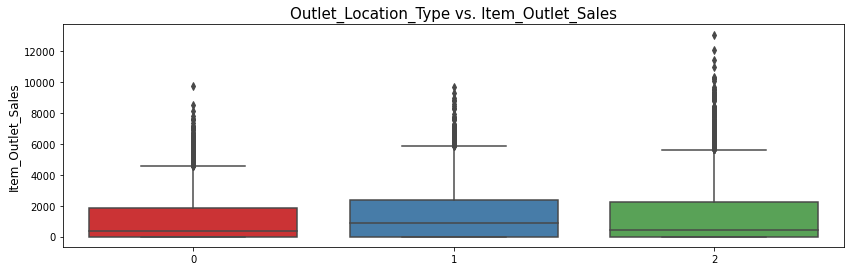

In [54]:
plt.figure(figsize = (14,9))

plt.subplot(212)
a = sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
a.set_title("Outlet_Location_Type vs. Item_Outlet_Sales", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Item_Outlet_Sales", fontsize=12) 

Text(0, 0.5, 'Item_Outlet_Sales')

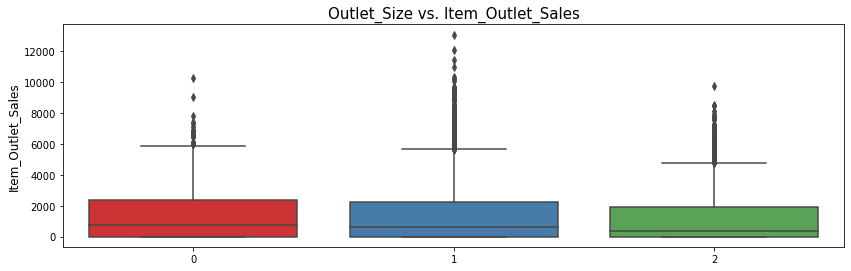

In [55]:
plt.figure(figsize = (14,9))

plt.subplot(211)
a = sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data, palette="Set1")
a.set_title("Outlet_Size vs. Item_Outlet_Sales", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Item_Outlet_Sales", fontsize=12) 

Text(0, 0.5, 'Item_Outlet_Sales')

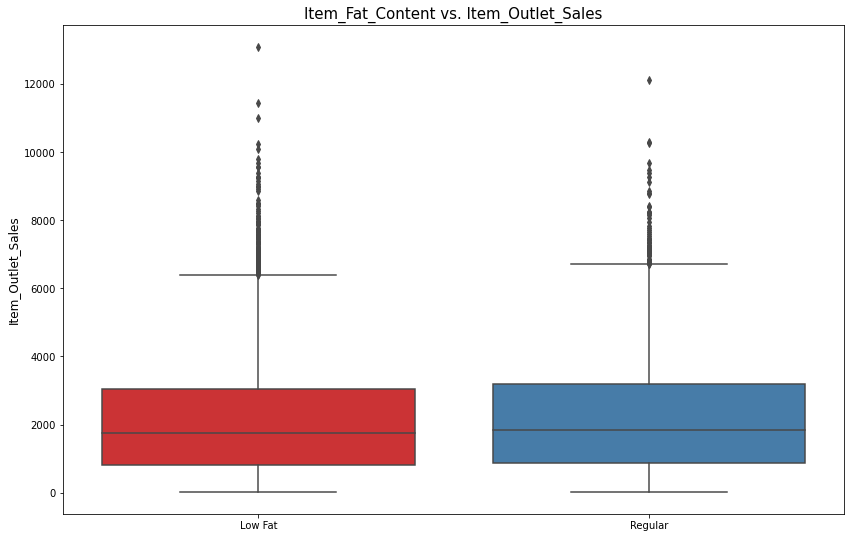

In [25]:
plt.figure(figsize = (14,9))

plt.subplot(111)
a = sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=datatrain, palette="Set1")
a.set_title("Item_Fat_Content vs. Item_Outlet_Sales", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Item_Outlet_Sales", fontsize=12) 

#we can observe their is inky two category low fat and regular but named differnetly so we should combined low,LF and Low Fat as 1 category and regular and reg as regular category

In [21]:


df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print(df['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [22]:
datatrain['Item_Fat_Content'] = datatrain['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [58]:
#categorised as low fat and regular

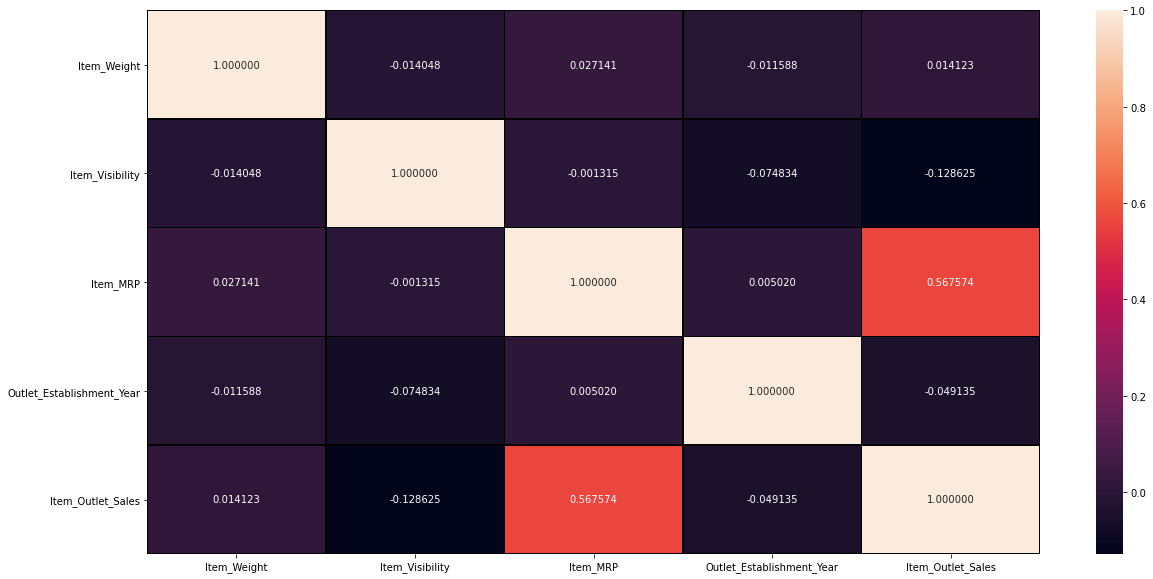

In [26]:
datatrain.corr()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(datatrain.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='2f')

Text(0, 0.5, 'Item_Outlet_Sales')

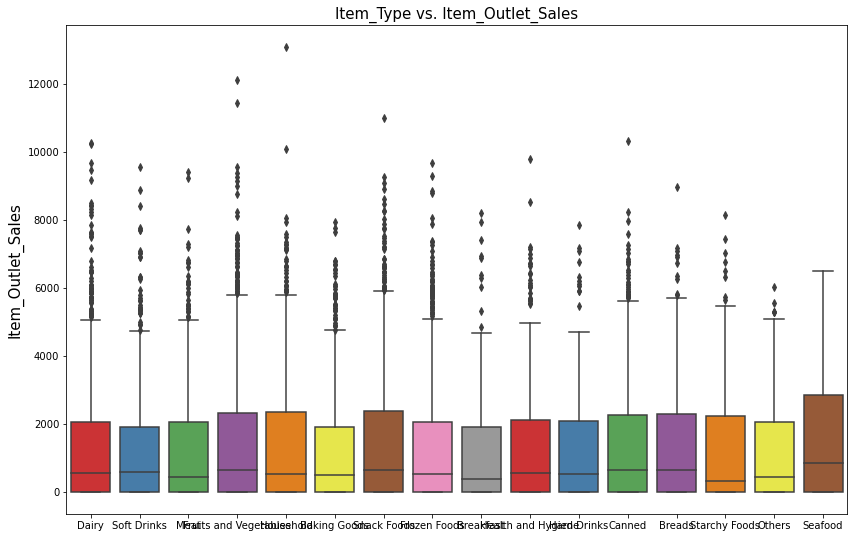

In [59]:
plt.figure(figsize = (14,9))

plt.subplot(111)
a = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
a.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Item_Outlet_Sales", fontsize=15) 

In [57]:
print(df['Item_Type'].value_counts())

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


#item type and item identifier belongs to same items,but we find 1559 unique code foritem identifier with codes starting FD,NC,DR which could be food,non consumables and drinks respectively hence we can replace the same

In [58]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

Text(0, 0.5, 'Item_Outlet_Sales')

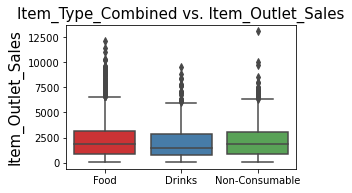

In [59]:
plt.figure(figsize = (14,9))

plt.subplot(333)
a = sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=df, palette="Set1")
a.set_title("Item_Type_Combined vs. Item_Outlet_Sales", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Item_Outlet_Sales", fontsize=15) 

In [60]:
df.loc[df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content']="Non_Edible"



In [63]:
#we have only 2 category low fat and regular so non consumables are listed under low fat
#hence we will create new category non edible for non consumable type of goods

In [64]:
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non_Edible    2686
Name: Item_Fat_Content, dtype: int64

In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
var=['Outlet_Identifier','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type']

for i in var:
    df[i]=le.fit_transform(df[i])

In [69]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  int64  
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   source                     14204 non-null  object 
 9   Outle_Years                14204 non-null  int64  
 10  Outlet_Years               14204 non-null  int64  
 11  Item_Fat_Content_0         14204 non-null  uint8  
 12  Item_Fat_Content_1         14204 non-null  uint8  
 13  Item_Fat_Content_2         14204 non-null  uint

In [71]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outle_Years,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,FDA15,9.30,0.016047,Dairy,249.8092,9,1999,3735.1380,train,10,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,3,2009,443.4228,train,0,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,9,1999,2097.2700,train,10,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,0,1998,732.3800,train,11,...,0,1,0,1,0,0,0,0,1,0
4,NCD19,8.93,0.000000,Household,53.8614,1,1987,994.7052,train,22,...,1,0,0,0,1,0,0,0,0,1


In [72]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [73]:
train=df.loc[df['source']=='train']
test=df.loc[df['source']=='test']

In [77]:
train.drop(['source'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

KeyError: "['source'] not found in axis"

In [78]:
train.columns,test.columns

(Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Identifier', 'Item_Outlet_Sales', 'Outle_Years', 'Outlet_Years',
        'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
        'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
        'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
        'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
        'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1',
        'Item_Type_Combined_2'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Identifier', 'Item_Outlet_Sales', 'source', 'Outle_Years',
        'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
        'Item_Fat_Content_2', 'Outlet_Location_Type_0',
        'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
        'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
        'Outl

In [80]:
train.shape,test.shape

((8523, 24), (5681, 25))

In [129]:
x_train=train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)

In [130]:
y_train=train['Item_Outlet_Sales']

In [131]:
x_test=test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

In [132]:
x_train.shape,y_train.shape,x_test.shape

((8523, 21), (8523,), (5681, 21))

In [133]:
x_train.columns,x_test.columns

(Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outle_Years',
        'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
        'Item_Fat_Content_2', 'Outlet_Location_Type_0',
        'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
        'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
        'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
        'Item_Type_Combined_1', 'Item_Type_Combined_2'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outle_Years',
        'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
        'Item_Fat_Content_2', 'Outlet_Location_Type_0',
        'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
        'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
        'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
        'Item_Type_Combined_1', 'Item_Type_Combined_2'],
       dtype='object'))

In [134]:
#LINEAR REGRESSION

In [135]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

In [136]:
lr_pred

array([1800.72104563, 1610.86340086, 1873.76046516, ..., 1817.34932143,
       3599.32821853, 1272.91094942])

In [137]:
lr_accuracy=round(lr.score(x_train,y_train)*100)
lr_accuracy

56.0

In [138]:
#Decision Tree Regressor

In [139]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

In [140]:
dt_pred

array([1691.90780174, 1412.15620504,  584.75776477, ..., 1771.68851587,
       3627.54989126, 1240.36730761])

In [141]:
dt_accuracy=round(dt.score(x_train,y_train)*100)
dt_accuracy

61.0

In [142]:
#Random Forest Regressor

In [143]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_accuracy=round(rf.score(x_train,y_train)*100)
rf_accuracy

61.0

In [144]:
#XGBoost Regressor

In [149]:
import xgboost as xgb
from xgb import XGBRegressor

xgb_model=XBGRegressor(n_estimators=1000,learning_rate=0.05)
xgb_model.fit(x_train,y_train)

ModuleNotFoundError: No module named 'xgboost'

In [152]:
y_pred=xgb_model.predict(x_test)
y_pred

NameError: name 'xgb_model' is not defined

In [153]:
xgb_model.score(x_train,y_train)*100

NameError: name 'xgb_model' is not defined

In [157]:
from sklearn.svm import SVR
sv=SVR()
sv=SVR(kernel='linear')
sv.fit(x_train,y_train)
sv_pred=sv.predict(x_test)
sv_accuracy=round(sv.score(x_train,y_train)*100)
sv_accuracy

47.0

In [ ]:
#ADABOOST REGRESSOR

In [161]:
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
ADB.fit(x_train,y_train)
ADB_pred=ADB.predict(x_test)
ADB_accuracy=round(ADB.score(x_train,y_train)*100)
ADB_accuracy

55.0

In [167]:
#SGDRegressor

In [166]:

from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
SGD_pred=SGD.predict(x_test)
SGD_accuracy=round(SGD.score(x_train,y_train)*100)
SGD_accuracy

-6.25381093112933e+20

In [172]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred=gbr.predict(x_test)
gbr_accuracy=round(gbr.score(x_train,y_train)*100)
gbr_accuracy                              

63.0

In [173]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
ls.fit(x_train,y_train)
ls_pred=ls.predict(x_test)
ls_accuracy=round(ls.score(x_train,y_train)*100)
ls_accuracy 

56.0

In [174]:
#from the above analysis it is evident that GradientBoostingRegressor is the best model with 63% accuracy score

In [175]:
#MODEL SAVING

In [176]:
import pickle
filename='Bigdatamart.csv.pkl'
pickle.dump(gbr,open(filename,'wb'))


In [177]:
#CONCLUSION

In [180]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gbr.predict(x_test))

NameError: name 'y_test' is not defined

In [181]:
DF_CON=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

NameError: name 'predicted' is not defined